In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import cm
from sklearn.metrics import confusion_matrix

# Loading data

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

- We have 918 observations and 14 features

In [ ]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- All the features seem normal, except for the fbs and exng. One of the reason could be we have many value 0s

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- It was great that all the data has been converted to numerical one.

# Data Analysis

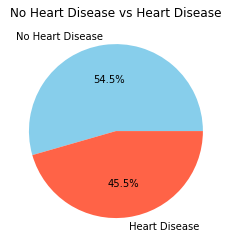

In [ ]:
# Define the labels for the pie chart
labels = ["No Heart Disease", "Heart Disease"]

# Count the number of healthy and heart disease cases in the raw data
healthy_count, disease_count = df['output'].value_counts()

values = [healthy_count, disease_count]
plt.pie(values, labels=labels, colors=["skyblue", "tomato"], autopct='%1.1f%%')

plt.title("No Heart Disease vs Heart Disease")
plt.show()


- It appears that the target variable in the dataset is not evenly distributed. The distribution of the target variable indicates an imbalance, as there is a higher prevalence of the positive class (heart disease present) compared to the negative class (heart disease not present).

 ***Which gender will likely to have heart disease than the other?***

Text(0, 0.5, 'Count')

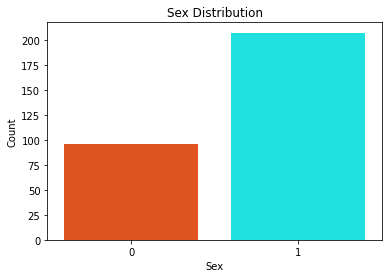

In [ ]:
sns.countplot(data=df, x='sex', palette=['orangered','cyan']);
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

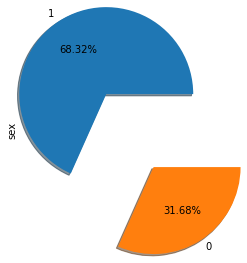

In [ ]:
df['sex'].value_counts().plot.pie(explode=[0.5, 0.5], autopct='%1.2f%%', shadow=True)

# Show the plot
plt.show()

- We can say that the males are more likely to have heart diseases with 68.32% throughout the whole dataset. Meanwhile, females are having less heart diseases (31.68% - about a half of that number from males).

***How about the distribution of chest pain type according to male and female seperately? This is important as it is the first sign indicating a beginning for many diseases***

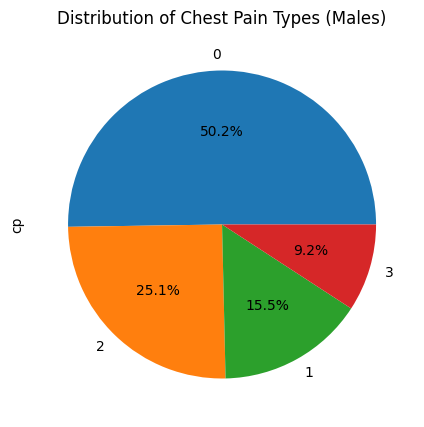

In [ ]:
male_df = df[df['sex'] == 1]
plt.figure(3, figsize=(5,5))
male_df['cp'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distribution of Chest Pain Types (Males)")
plt.show()

For male:
+ 50% has type 0 (ASY-dangerous)
+ 15.5% has type 1(ATA)
+ 25.1% has type 2(NAP)
+ 9.2% has type 3 (TA)

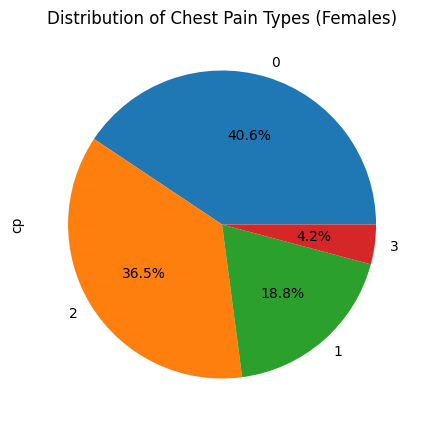

In [ ]:
female_df = df[df['sex'] == 0]
plt.figure(3, figsize=(5,5))
female_df['cp'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distribution of Chest Pain Types (Females)")
plt.show()

For female:
+ 40.6% has type 0 (ASY-dangerous)
+ 18.8% has type 1(ATA)
+ 36.5% has type 2(NAP)
+ 4.2% has type 3 (TA)

***What is the age distribution of people who have heart diseases?***

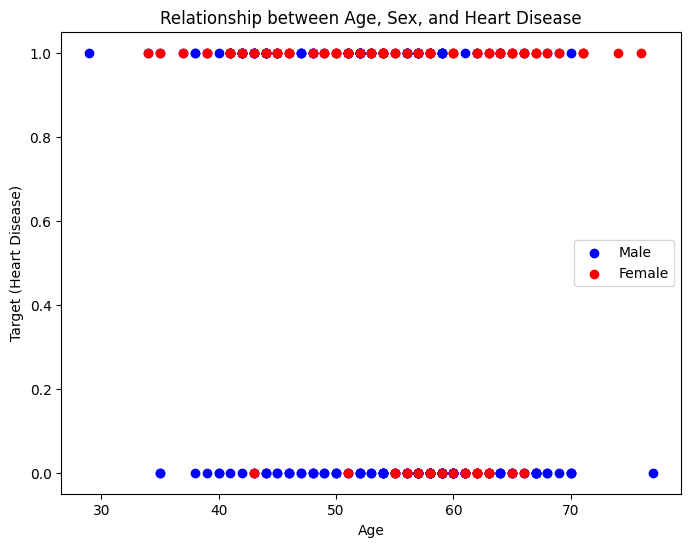

In [ ]:
male_df = df[df['sex'] == 1]
female_df = df[df['sex'] == 0]

# Plot the scatter plot for male and female data points
plt.figure(figsize=(8, 6))
plt.scatter(male_df['age'], male_df['output'], color='blue', label='Male')
plt.scatter(female_df['age'], female_df['output'], color='red', label='Female')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Target (Heart Disease)')
plt.title('Relationship between Age, Sex, and Heart Disease')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
age_intervals = [
    {'label': '29-40', 'start': 29, 'end': 40},
    {'label': '41-50', 'start': 41, 'end': 50},
    {'label': '51-60', 'start': 51, 'end': 60},
    {'label': '61-70', 'start': 61, 'end': 70},
    {'label': '71-80', 'start': 71, 'end': 80}
]

# Calculate the percentage of individuals with heart disease in each age interval
for interval in age_intervals:
    age_range = df[(df['age'] >= interval['start']) & (df['age'] <= interval['end'])]
    heart_disease_count = age_range[age_range['output'] == 1].shape[0]
    total_count = age_range.shape[0]
    percentage = (heart_disease_count / total_count) * 100
    print(f"Age {interval['label']}: {percentage:.1f}%")


Age 29-40: 68.4%
Age 41-50: 69.7%
Age 51-60: 49.6%
Age 61-70: 41.1%
Age 71-80: 83.3%


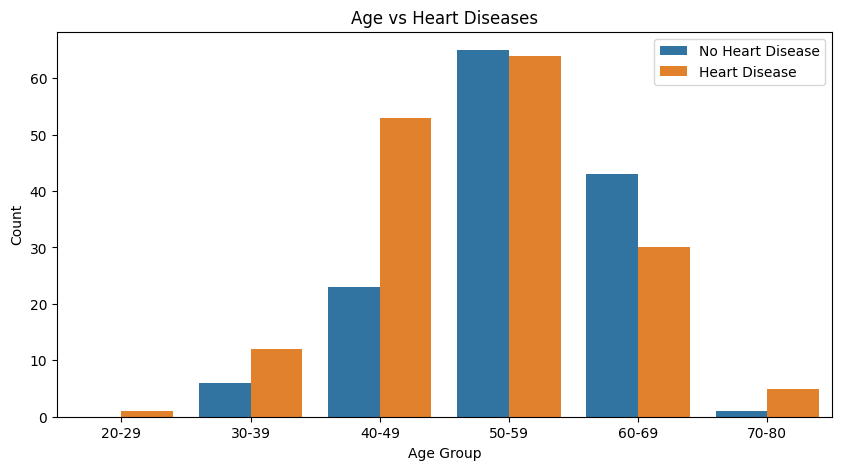

In [ ]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-80']

plt.figure(figsize=(10, 5))
sns.countplot(x=pd.cut(df['age'], bins=bins, labels=labels), data=df, hue='output')

# Update legend labels
legend_labels = ['No Heart Disease', 'Heart Disease']
plt.legend(legend_labels)

plt.title('Age vs Heart Diseases')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()

- The countplot shows that there is very high risk the individual will develop heart diseases in the late 30s. This peaks at the age range 40-70 in both genders.

***Examine the distribution of body's indexes.***

In [ ]:
heart_disease_fbs = df.groupby('fbs')['output'].mean() * 100
print(heart_disease_fbs)

fbs
0    55.038760
1    51.111111
Name: output, dtype: float64


In [ ]:
heart_disease_exng = df.groupby('exng')['output'].mean() * 100
print(heart_disease_exng)

exng
0    69.607843
1    23.232323
Name: output, dtype: float64


In [ ]:
heart_disease_slp = df.groupby('slp')['output'].mean() * 100
print(heart_disease_slp)

slp
0    42.857143
1    35.000000
2    75.352113
Name: output, dtype: float64


In [ ]:
heart_disease_caa = df.groupby('caa')['output'].mean() * 100
print(heart_disease_caa)

caa
0    74.285714
1    32.307692
2    18.421053
3    15.000000
4    80.000000
Name: output, dtype: float64


In [ ]:
heart_disease_thall = df.groupby('thall')['output'].mean() * 100
print(heart_disease_thall)

thall
0    50.000000
1    33.333333
2    78.313253
3    23.931624
Name: output, dtype: float64


#### **General Visualisation**


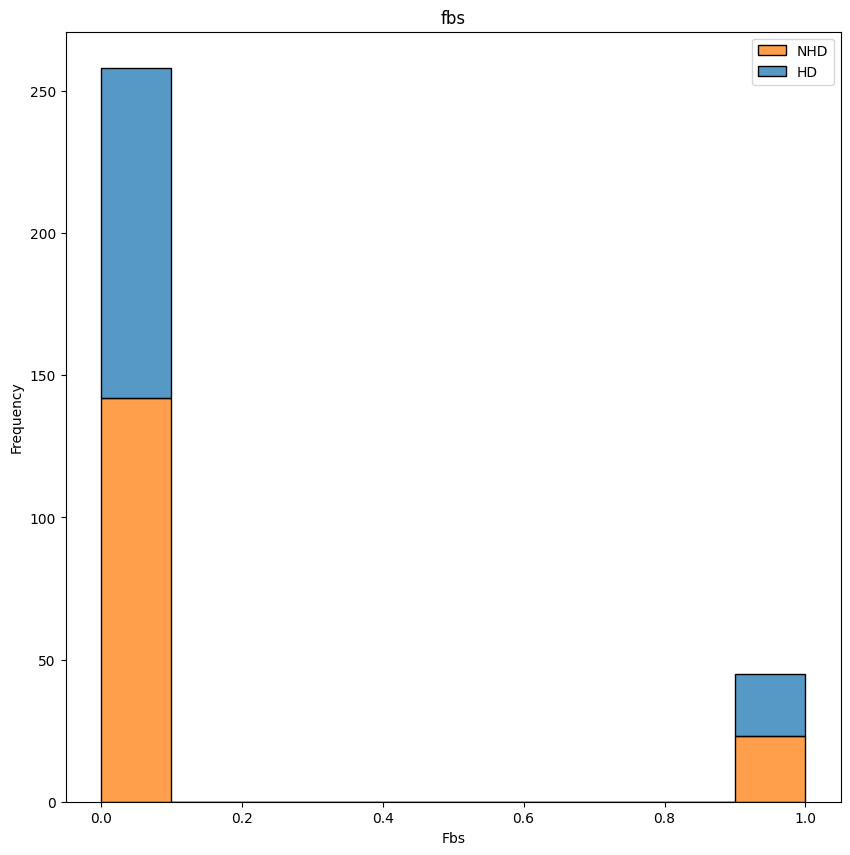

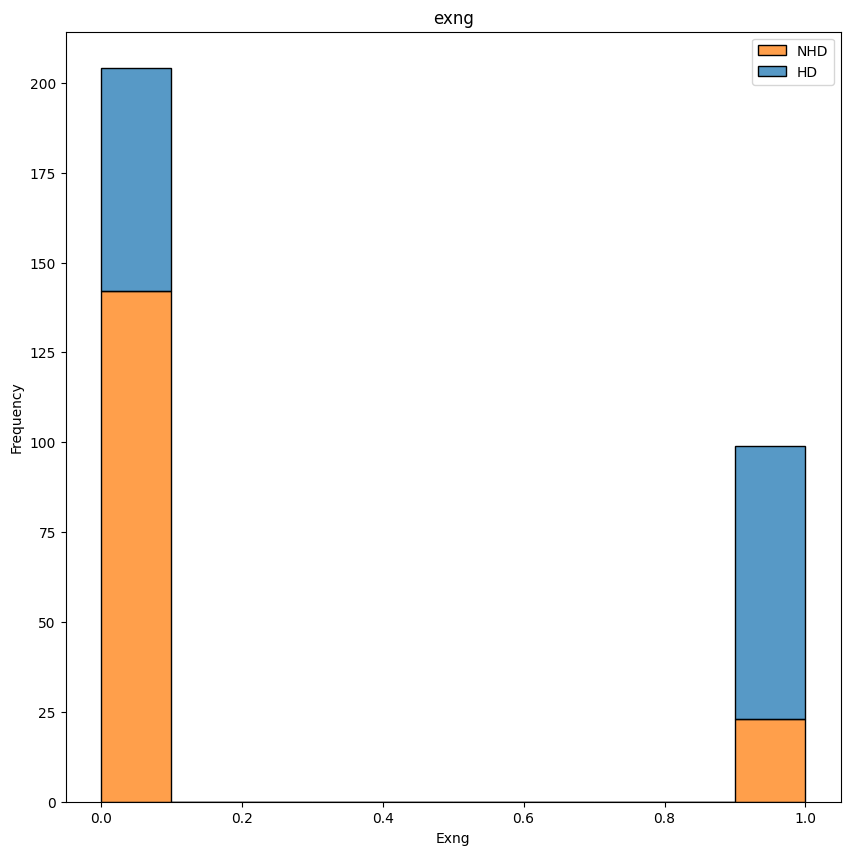

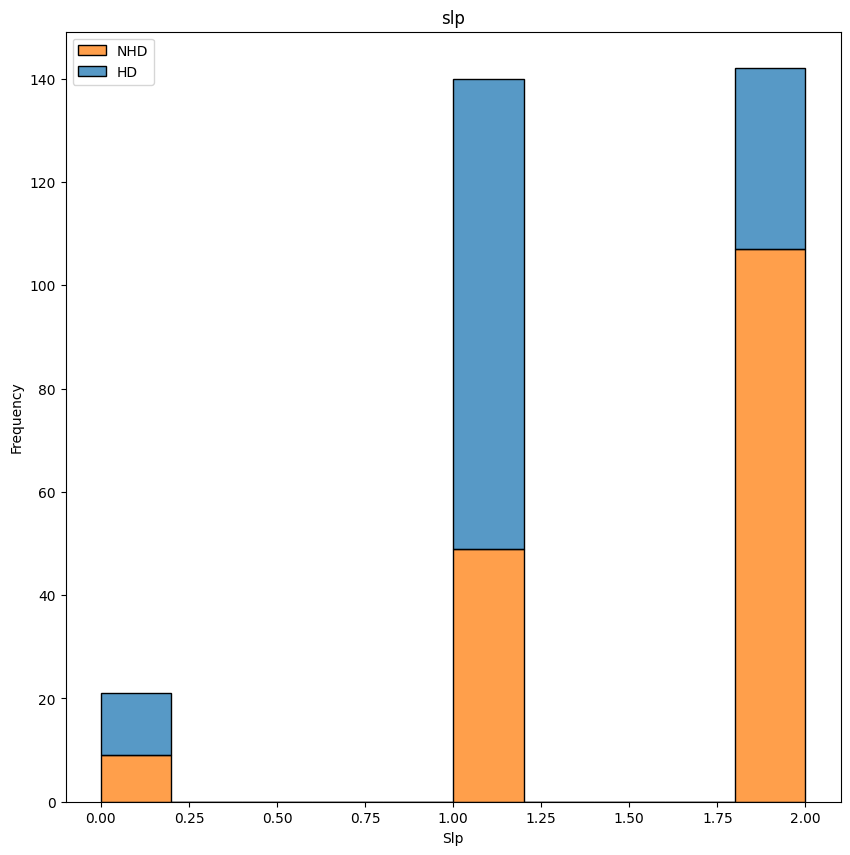

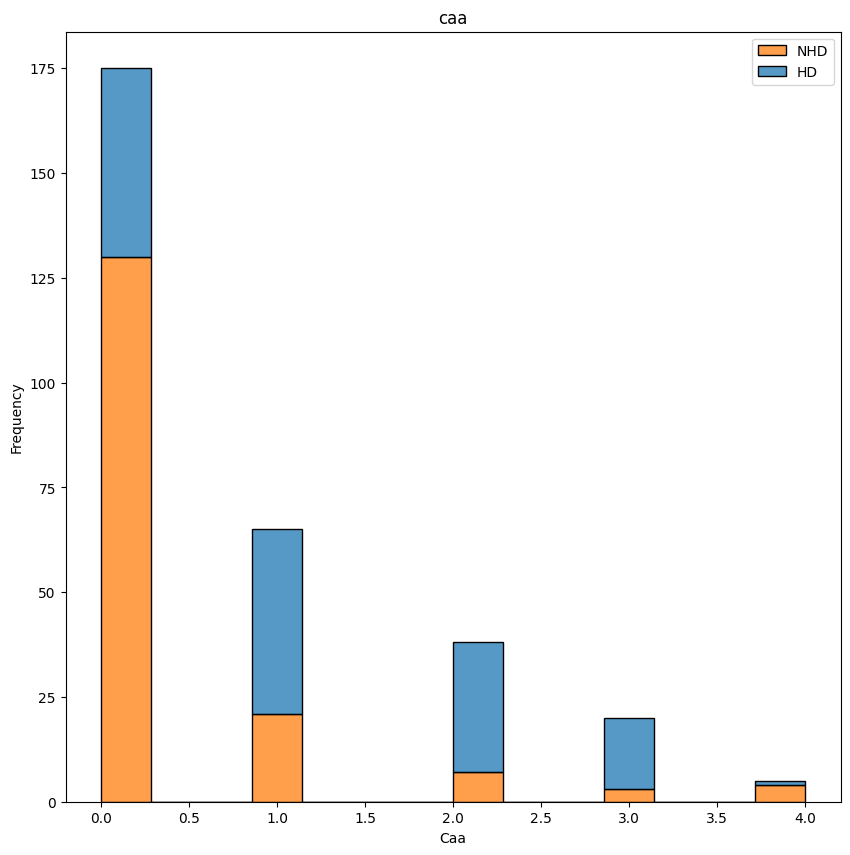

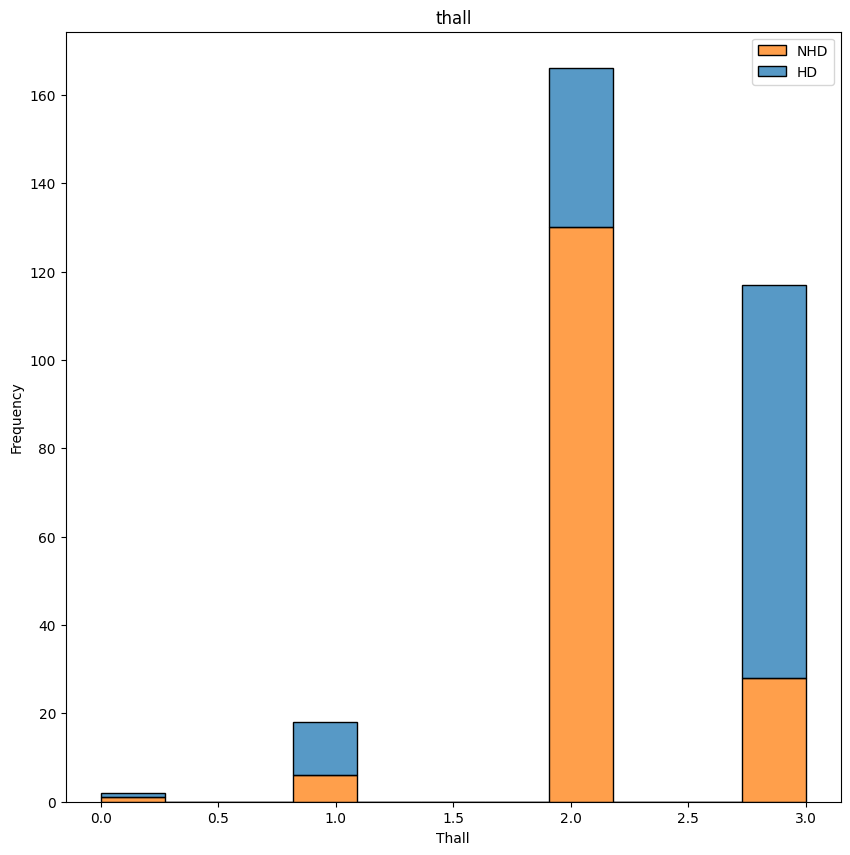

In [ ]:
body_idx = ['fbs', 'exng', 'slp', 'caa', 'thall']

# Build countplot for all the features about body indexes
for i in body_idx:
  plt.figure(figsize=(10,10))
  sns.histplot(data=df, x=i, hue='output', multiple='stack', edgecolor='black')
  plt.legend(['NHD', 'HD'])
  plt.title(i)
  plt.xlabel(i.capitalize())
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

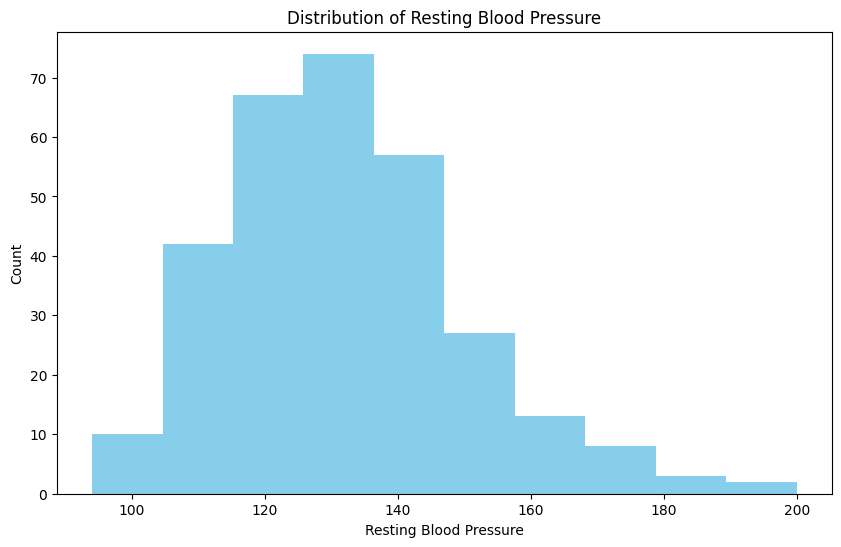

In [ ]:
with_heart_disease = df[df['output'] == 1]
without_heart_disease = df[df['output'] == 0]

# Distribution of Resting Blood Pressure
plt.figure(figsize=(10, 6))
plt.hist(df['trtbps'], bins=10, color='skyblue')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.title('Distribution of Resting Blood Pressure')
plt.show()


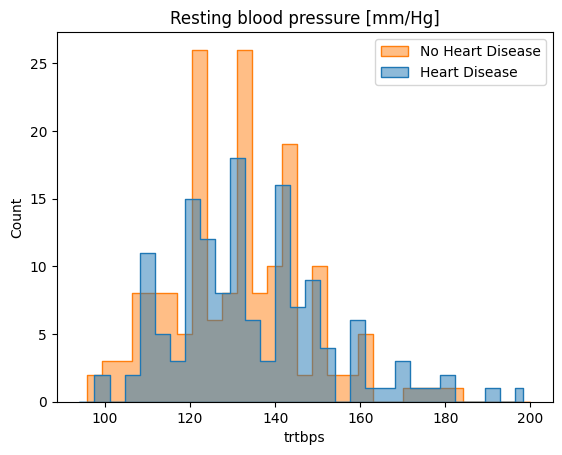

In [ ]:
sns.histplot(data=df, x='trtbps', bins=30, hue='output', multiple='dodge', element='step', alpha=0.5)
plt.title('Resting blood pressure [mm/Hg]')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

- Since there are many values in chol, restecgm thalachh, oldpeak - we will create 30 bins range to see the overal distribution

In [ ]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

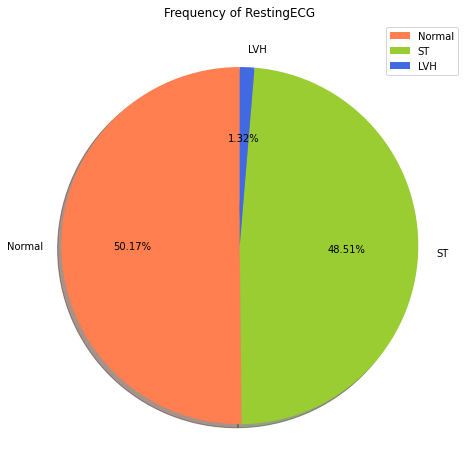

In [ ]:
plt.figure(figsize=(8,9))
plt.pie([152, 147, 4] , explode=(0,0,0) , labels=['Normal', 'ST', 'LVH'] ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['coral', 'yellowgreen', 'royalblue'])
plt.title("Frequency of RestingECG")
plt.legend()

In [ ]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

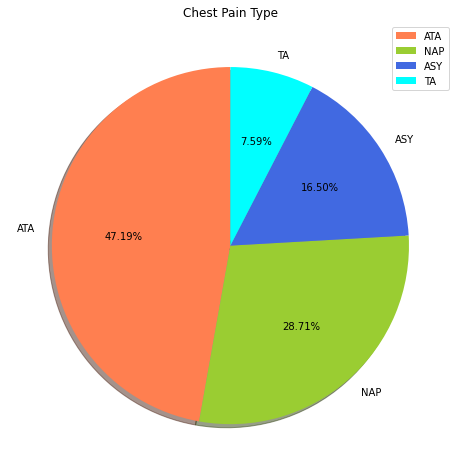

In [ ]:
plt.figure(figsize=(8,9))
plt.pie([143, 87, 50, 23] , explode=(0,0,0,0) , labels=['ATA', 'NAP', 'ASY', 'TA'] ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['coral', 'yellowgreen', 'royalblue', 'cyan'])
plt.title("Chest Pain Type")
plt.legend()

In [ ]:
df['slp'].value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

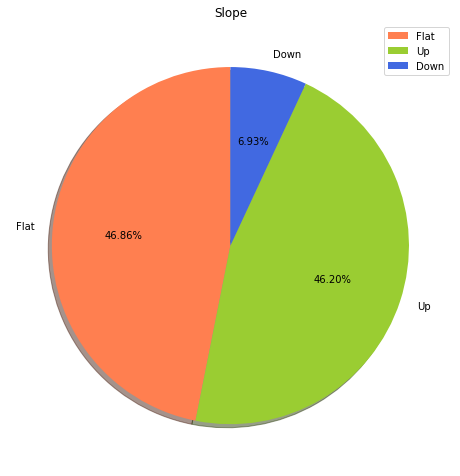

In [ ]:
plt.figure(figsize=(8,9))
plt.pie([142,140,21] , explode=(0,0,0) , labels=['Flat','Up','Down'] ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['coral', 'yellowgreen', 'royalblue'])
plt.title("Slope")
plt.legend()

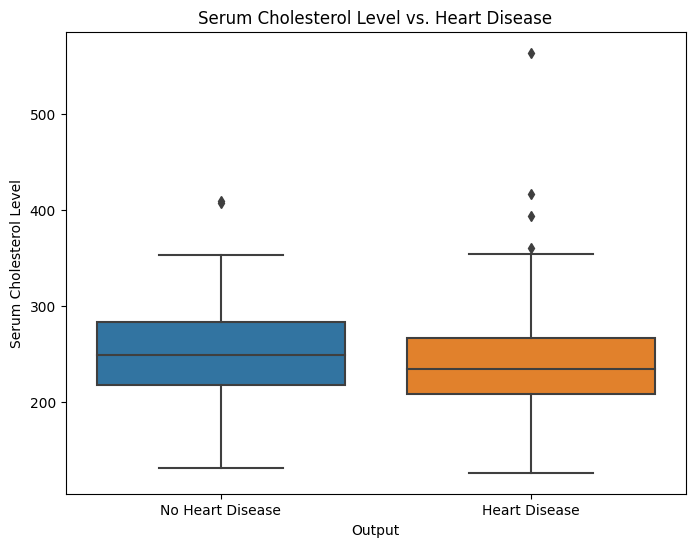

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='output', y='chol', data=df)

plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Output')
plt.ylabel('Serum Cholesterol Level')
plt.title('Serum Cholesterol Level vs. Heart Disease')

plt.show()

In [ ]:
from scipy import stats

In [ ]:
chol_with_heart_disease = df[df['output'] == 1]['chol']
chol_without_heart_disease = df[df['output'] == 0]['chol']

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(chol_with_heart_disease, chol_without_heart_disease)

# Output the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -1.4842450762526977
P-Value: 0.13879032695600638


In [ ]:
rest_ind = ['chol', 'restecg', 'thalachh', 'oldpeak']

In [ ]:
def pair_plot(df, col_name, target):
  plt.figure(figsize=(12,6))

  plt.subplot(1, 2, 1)
  sns.histplot(df[col_name], bins=30, color = 'r')
  plt.title('Histogram')

  plt.subplot(1, 2, 2)
  sns.barplot(x = target, y = col_name, data = df)
  plt.title('Barplot')

  plt.show()




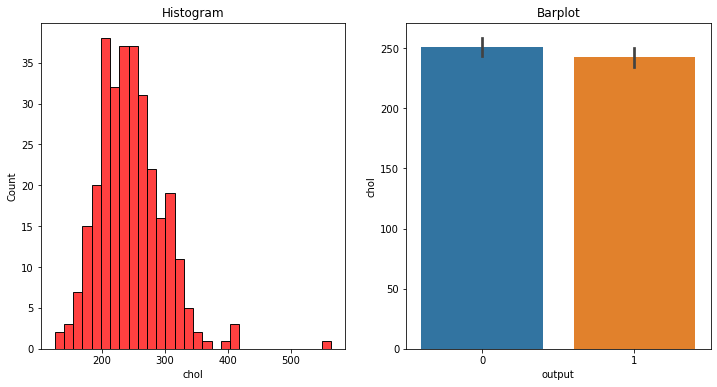

None


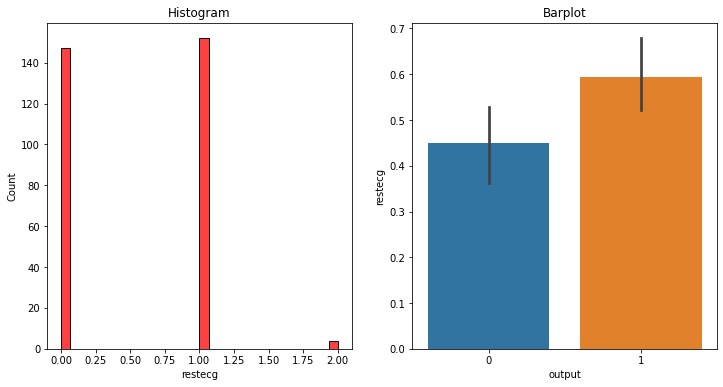

None


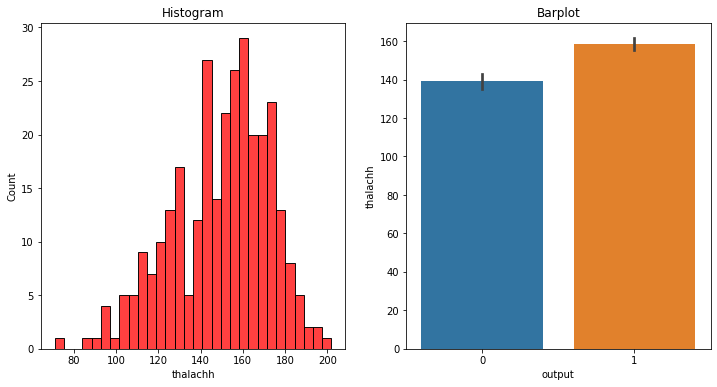

None


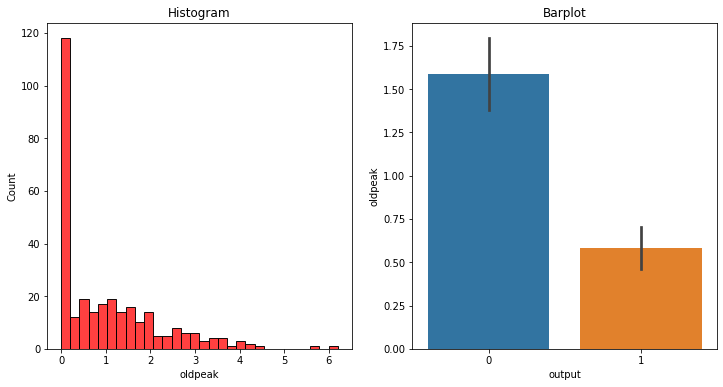

None


In [ ]:
for i in rest_ind:
  print(pair_plot(df, i , 'output'))

***What about the correlation of the features?***


<Axes: >

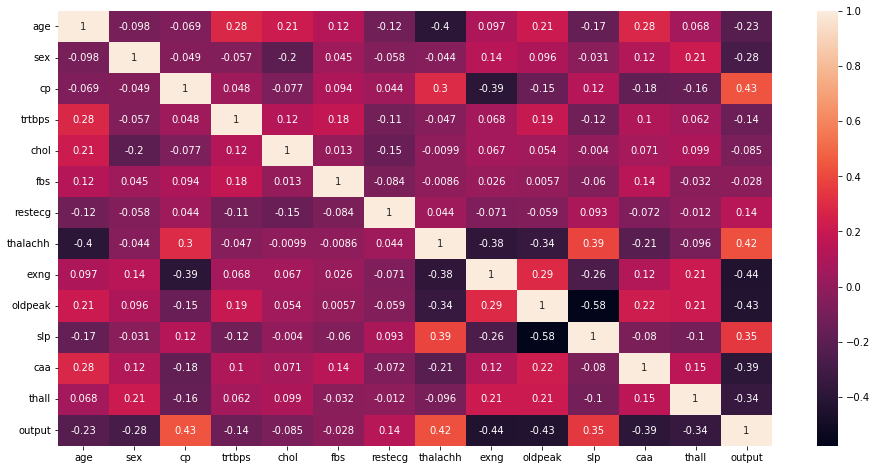

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

## **Temporary Conclusion:**
##### - The risk of having CVD increases with age.
##### - Both females and males experience 'Non Anginal Pain' the most compared with other chest pain types.
##### - Most people have a moderate fasting sugar blood level (<120mg/dl). None significant observations showing a high connection between fbs and heart diseases.
##### - People with heart disease will likely to have low exng.
##### - If the individual have flat/sloping ST segment appear to be more likely to have heart disease
##### - As the number of major vessels (caa) increases, the proportion of people having CVD rises.
##### - People who have fixed/reversible defect in thall indices appear to have a greater risk of CVD.
##### - Individuals with cardiac disease (output=1) are more prevalent in the mid-range of resting blood pressure levels.
##### - The difference in cholesterol levels between the two groups may not be significant.


# Data Processing

### ***Let's check the outliers***

<Axes: >

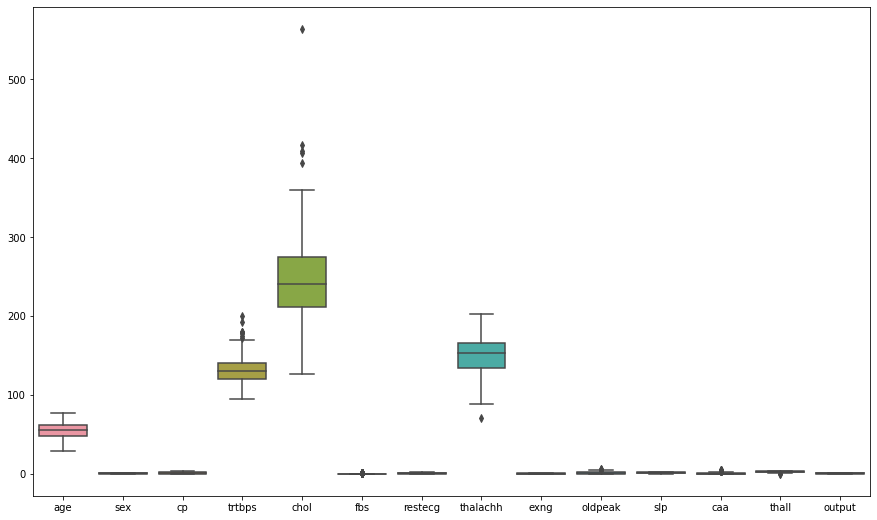

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(data=df)

Further analysis on attributes with outliers (the ones having a few dots appearing near the boxplot)



In [ ]:
outliers = ['trtbps', 'chol', 'fbs', 'thalachh', 'oldpeak', 'caa', 'thall']

In [ ]:
def find_outliers_IQR(df):
    q1, q3 = df.quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR
    outliers = df[(df < lower_bound) | (df > upper_bound)]
    return outliers

In [ ]:
for i in outliers :
    outs = find_outliers_IQR(df[i])

    print(f" For {i} outliers ")

    print('Count: '+ str(len(outs)))

    print('Max value: '+ str(outs.max()))

    print('Min value: '+ str(outs.min())+ '\n')
    ## Drop the ouliers from the original DataFrame
    df = df.drop(outs.index)

 For trtbps outliers 
Count: 9
Max value: 200
Min value: 172

 For chol outliers 
Count: 5
Max value: 564
Min value: 394

 For fbs outliers 
Count: 40
Max value: 1
Min value: 1

 For thalachh outliers 
Count: 1
Max value: 71
Min value: 71

 For oldpeak outliers 
Count: 4
Max value: 6.2
Min value: 4.2

 For caa outliers 
Count: 15
Max value: 4
Min value: 3

 For thall outliers 
Count: 1
Max value: 0
Min value: 0



### ***Feature selection and Normalisation***

In [ ]:
## Split training and testing split
X = df.drop('output', axis=1)
y = df['output']

In [ ]:
##Test X
X.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
## Split the data with 80% of training and 20% of testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

std_scaler.fit(X_train)

# Standardize the numerical attributes in the training and testing sets
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

# Create new DataFrames with standardized numerical attributes
#X_train = pd.DataFrame(X_train_std, columns=X.columns)
#X_test = pd.DataFrame(X_test_std, columns=X.columns)


In [ ]:
X_train_std

array([[ 1.61047991, -1.46385011,  2.04442042, ...,  0.94818498,
         1.20703366, -0.56122273],
       [ 1.28205058,  0.68313005,  0.05747367, ..., -0.6677359 ,
         2.16789598, -2.21751422],
       [ 0.0778097 , -1.46385011, -0.93599971, ..., -0.6677359 ,
         0.24617134,  1.09506875],
       ...,
       [-0.36009607, -1.46385011,  1.05094704, ...,  0.94818498,
        -0.71469098, -0.56122273],
       [ 0.0778097 ,  0.68313005,  0.05747367, ...,  0.94818498,
        -0.71469098, -0.56122273],
       [ 1.0630977 , -1.46385011, -0.93599971, ...,  0.94818498,
        -0.71469098, -0.56122273]])

In [ ]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [ ]:
X_test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3


# Applying Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
precisions={}
recalls={}
f1_scores={}
accuracy = {}
AUC = {}

##1. Naive Bayes Method

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Train the classifier on the training data
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make predictions on the testing data
y_pred=nb.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)*100
accuracy['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 81.97%


In [ ]:

cf_mat = confusion_matrix(y_test, y_pred)
print(cf_mat)

[[20  8]
 [ 3 30]]


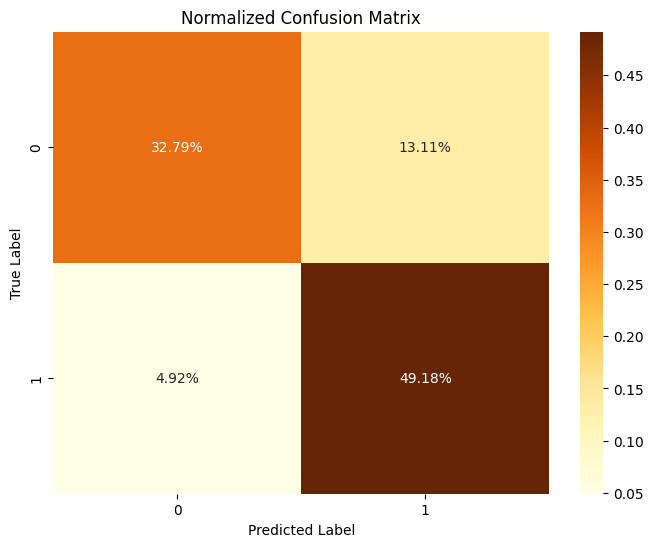

In [ ]:
normalized_cf_matrix = cf_mat / np.sum(cf_mat)
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_cf_matrix, annot=True, fmt='.2%', cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
recall = recall_score(y_test, y_pred)
recalls['Naive Bayes'] = recall

precision = precision_score(y_test, y_pred)
precisions['Naive Bayes'] = precision

f1 = f1_score(y_test, y_pred)
f1_scores['Naive Bayes'] = f1

In [ ]:
print("Naive Bayes Performance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Naive Bayes Performance Metrics:
Accuracy: {'Naive Bayes': 81.9672131147541}
Precision: 0.7894736842105263
Recall: 0.9090909090909091
F1-score: 0.8450704225352113


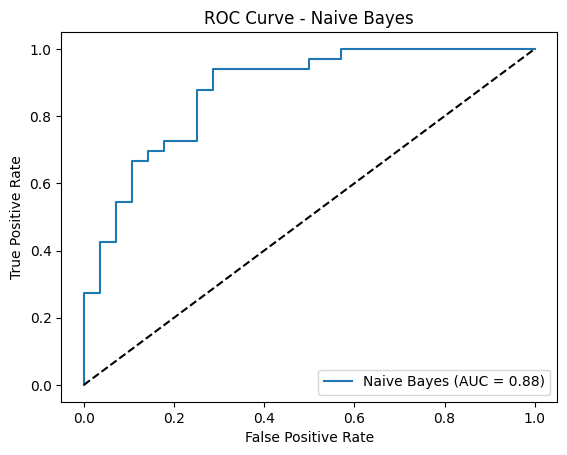

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for the positive class
y_probs = nb.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Naive Bayes (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()

In [ ]:
AUC['Naive Bayes'] = auc

##2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

In [ ]:
y_pred2=lr.predict(X_test_std)

In [ ]:
acc2 = accuracy_score(y_test, y_pred2)*100
accuracy['Logistic Regression'] = acc2
print("Accuracy of Logistic Regression: {:.2f}%".format(acc2))

Accuracy of Logistic Regression: 80.33%


In [ ]:
print(pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred2}))

     Y_test  Y_pred
179       0       0
197       0       0
285       0       0
194       0       1
188       0       1
..      ...     ...
14        1       1
4         1       1
224       0       0
202       0       0
12        1       1

[61 rows x 2 columns]


In [ ]:
cf_mat2 = confusion_matrix(y_test, y_pred2)
print(cf_mat2)

[[19  9]
 [ 3 30]]


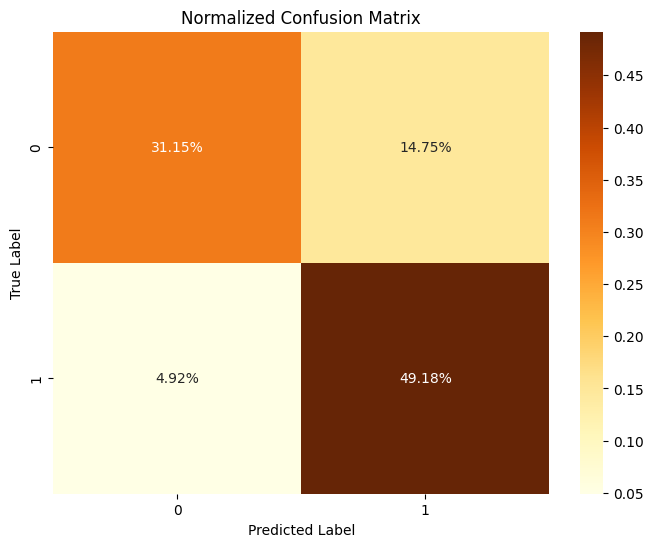

In [ ]:
normalized_cf_matrix2 = cf_mat2 / np.sum(cf_mat2)
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_cf_matrix2, annot=True, fmt='.2%', cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
recall2 = recall_score(y_test, y_pred2)
recalls['Logistic Regression'] = recall2

precision2 = precision_score(y_test, y_pred2)
precisions['Logistic Regression'] = precision2

f2 = 2*((precision2*recall2)/(precision2+recall2))
f1_scores['Logistic Regression'] = f2


In [ ]:
print("Logistic Regression Performance Metrics:")
print("Accuracy:", acc2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f2)

Logistic Regression Performance Metrics:
Accuracy: 80.32786885245902
Precision: 0.7692307692307693
Recall: 0.9090909090909091
F1-score: 0.8333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


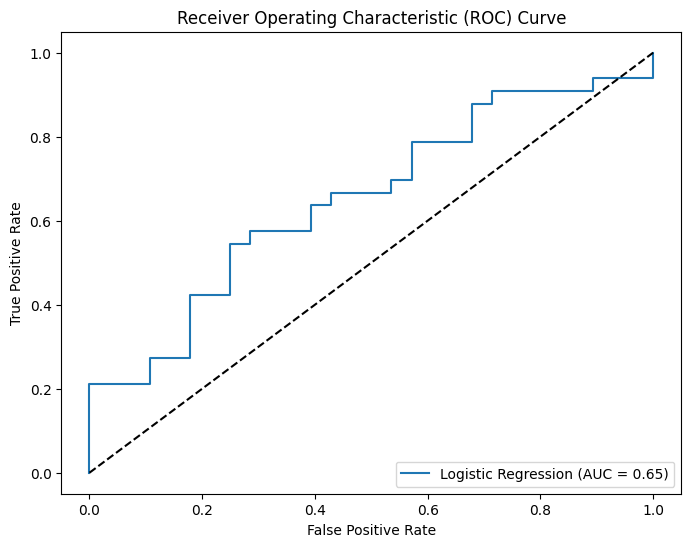

In [ ]:
# Calculate the predicted probabilities
y_pred_prob2 = lr.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob2)

# Calculate the AUC score
auc_score2 = roc_auc_score(y_test, y_pred_prob2)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc_score2))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
AUC['Logistic Regression'] = auc_score2

##3. Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y_pred3=dt.predict(X_test)

In [ ]:
acc3 = accuracy_score(y_test, y_pred3)*100
accuracy['Decision Tree'] = acc3
print("Accuracy of Decision Tree: {:.2f}%".format(acc3))

Accuracy of Decision Tree: 70.49%


In [ ]:
print(pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred3}))

     Y_test  Y_pred
179       0       1
197       0       0
285       0       0
194       0       1
188       0       1
..      ...     ...
14        1       0
4         1       0
224       0       0
202       0       0
12        1       1

[61 rows x 2 columns]


In [ ]:
cf_mat3 = confusion_matrix(y_test, y_pred3)
print(cf_mat3)

[[17 11]
 [ 7 26]]


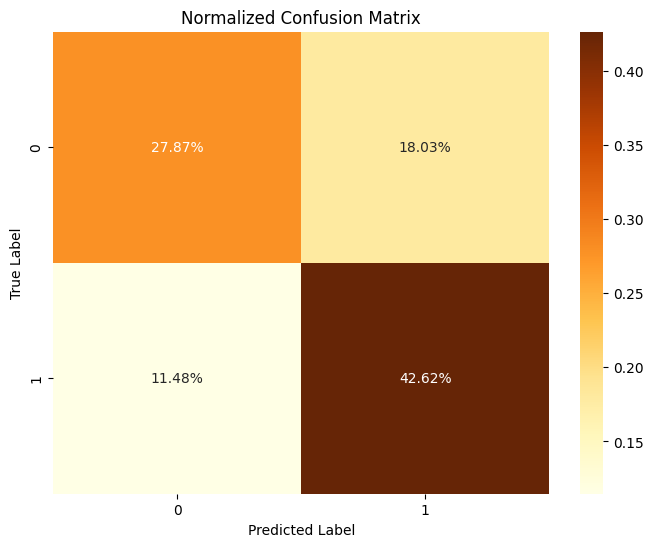

In [ ]:
normalized_cf_matrix3 = cf_mat3 / np.sum(cf_mat3)
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_cf_matrix3, annot=True, fmt='.2%', cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
recall3 = recall_score(y_test, y_pred3)
recalls['Decision Tree'] = recall3

precision3 = precision_score(y_test, y_pred3)
precisions['Decision Tree'] = precision3

f3 = 2*((precision3*recall3)/(precision3+recall3))
f1_scores['Decision Tree'] = f3

In [ ]:
print("Decision Tree Performance Metrics:")
print("Accuracy:", acc3)
print("Precision:", precision3)
print("Recall:", recall3)
print("F1-score:", f3)

Decision Tree Performance Metrics:
Accuracy: 70.49180327868852
Precision: 0.7027027027027027
Recall: 0.7878787878787878
F1-score: 0.7428571428571429


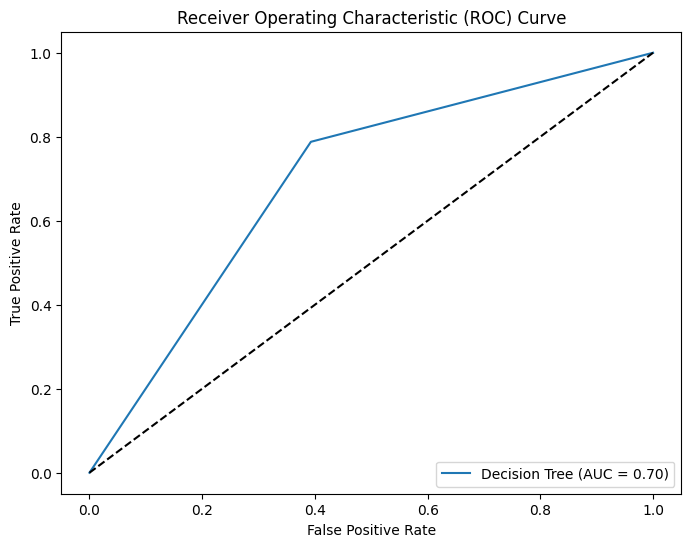

In [ ]:
# Calculate the predicted probabilities
y_pred_prob3 = dt.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob3)

# Calculate the AUC score
auc_score3 = roc_auc_score(y_test, y_pred_prob3)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(auc_score3))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
AUC['Decision Tree'] = auc_score3

##4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#### I will try to perform cross-validation to see if I need to add any estimators in the classifier

In [ ]:
# Define a list of different numbers of estimators to try
estimator_values = [50, 100, 150, 200, 250]

# Perform cross-validation for each number of estimators
for estimators in estimator_values:
    # Initialize the Random Forest classifier with the current number of estimators
    model = RandomForestClassifier(n_estimators=estimators)

    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # Print the average accuracy across all folds for the current number of estimators
    print("Number of estimators: %d, Average Accuracy: %.4f" % (estimators, scores.mean()))

Number of estimators: 50, Average Accuracy: 0.8183
Number of estimators: 100, Average Accuracy: 0.8216
Number of estimators: 150, Average Accuracy: 0.8183
Number of estimators: 200, Average Accuracy: 0.8314
Number of estimators: 250, Average Accuracy: 0.8249


The average accuracy doesn't seem that far from each other, this could imply that the number of estimators selected may not have a substantial impact on the model's performance in this scenario.

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred4=rf.predict(X_test)

In [ ]:
acc4 = accuracy_score(y_test, y_pred4)*100
accuracy['Random Forest'] = acc4
print("Accuracy of Random Forest: {:.2f}%".format(acc4))

Accuracy of Random Forest: 81.97%


In [ ]:
print(pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred4}))

     Y_test  Y_pred
179       0       0
197       0       0
285       0       0
194       0       1
188       0       1
..      ...     ...
14        1       1
4         1       1
224       0       0
202       0       0
12        1       1

[61 rows x 2 columns]


In [ ]:
cf_mat4 = confusion_matrix(y_test, y_pred4)
cf_mat4

array([[19,  9],
       [ 2, 31]])

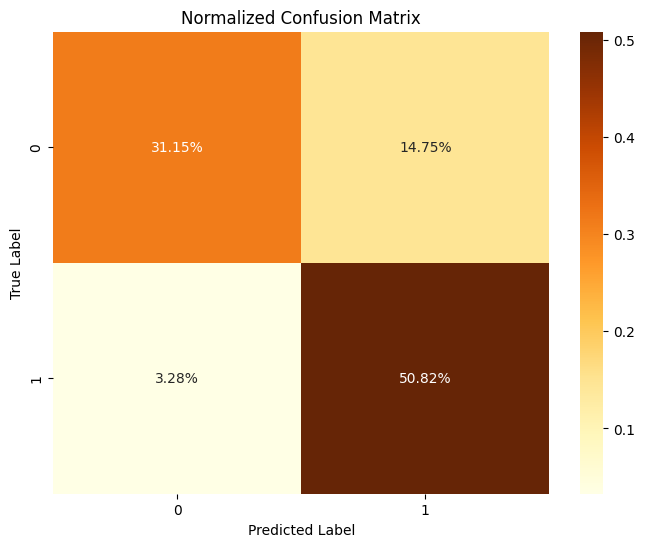

In [ ]:
normalized_cf_matrix4 = cf_mat4 / np.sum(cf_mat4)
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_cf_matrix4, annot=True, fmt='.2%', cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
recall4 = recall_score(y_test, y_pred4)
recalls['Random Forest'] = recall4

precision4 = precision_score(y_test, y_pred4)
precisions['Random Forest'] = precision4

f4 = 2*((precision4*recall4)/(precision4+recall4))
f1_scores['Random Forest'] = f4



In [ ]:
print("Random Forest Performance Metrics:")
print("Accuracy:", acc4)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1-score:", f4)

Random Forest Performance Metrics:
Accuracy: 81.9672131147541
Precision: 0.775
Recall: 0.9393939393939394
F1-score: 0.8493150684931509


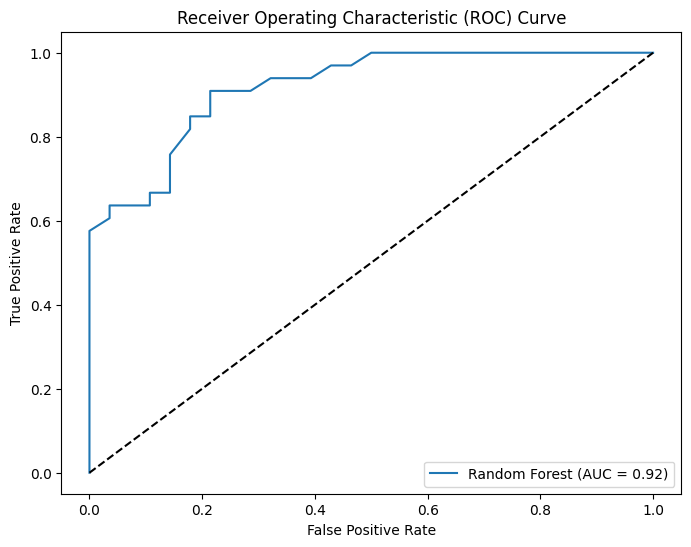

In [ ]:
# Calculate the predicted probabilities
y_pred_prob4 = rf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob4)

# Calculate the AUC score
auc_score4 = roc_auc_score(y_test, y_pred_prob4)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc_score4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
AUC['Random Forest'] = auc_score4

##5. KNN

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, X_train_std, y_train, cv=10)

print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.84       0.6        0.79166667 0.875      0.875      0.75
 0.875      0.91666667 0.91666667 0.75      ]


It appears that the model's performance varies across the folds, ranging from 60% to 91.67% accuracy.

In [ ]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred5=knn.predict(X_test_std)

In [ ]:
acc5 = accuracy_score(y_test, y_pred5)*100
accuracy['KNN'] = acc5
print("Accuracy of KNN: {:.2f}%".format(acc5))

Accuracy of KNN: 80.33%


In [ ]:
print(pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred5}))

     Y_test  Y_pred
179       0       0
197       0       0
285       0       0
194       0       1
188       0       1
..      ...     ...
14        1       1
4         1       1
224       0       0
202       0       0
12        1       1

[61 rows x 2 columns]


In [ ]:
cf_mat5 = confusion_matrix(y_test, y_pred5)
cf_mat5

array([[20,  8],
       [ 4, 29]])

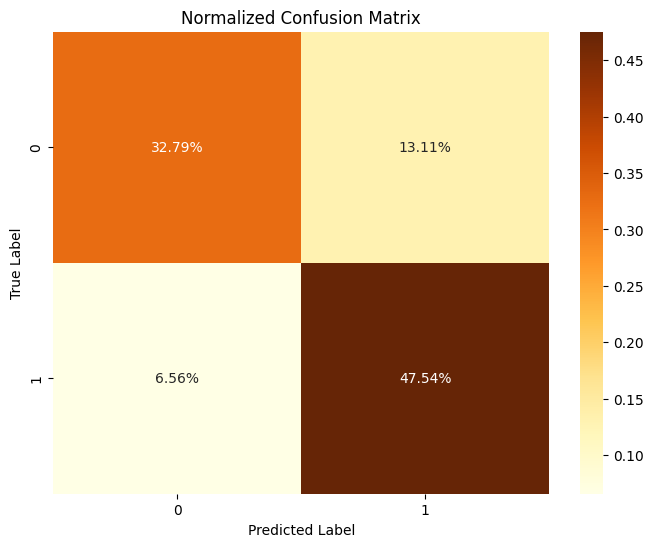

In [ ]:
normalized_cf_matrix5 = cf_mat5 / np.sum(cf_mat5)
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_cf_matrix5, annot=True, fmt='.2%', cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
recall5 = recall_score(y_test, y_pred5)
recalls['KNN'] = recall5

precision5 = precision_score(y_test, y_pred5)
precisions['KNN'] = precision5

f5 = 2*((precision5*recall5)/(precision5+recall5))
f1_scores['KNN'] = f5

In [ ]:
print("KNN Performance Metrics:")
print("Accuracy:", acc5)
print("Precision:", precision5)
print("Recall:", recall5)
print("F1-score:", f5)

KNN Performance Metrics:
Accuracy: 80.32786885245902
Precision: 0.7837837837837838
Recall: 0.8787878787878788
F1-score: 0.8285714285714285


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


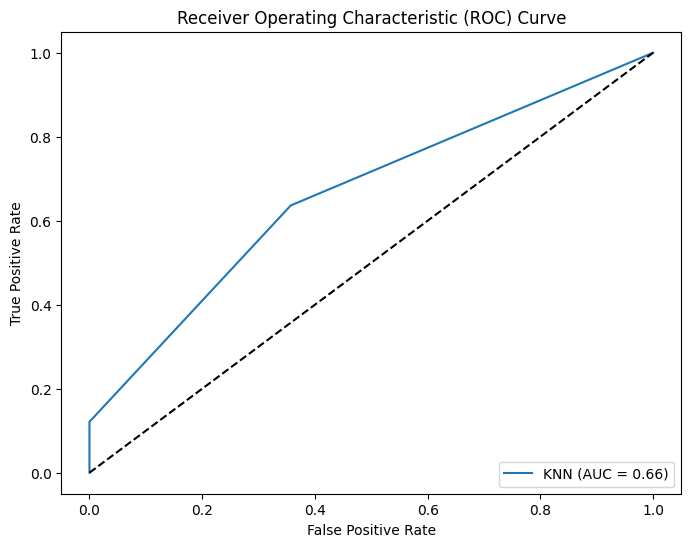

In [ ]:
# Calculate the predicted probabilities
y_pred_prob5 = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob5)

# Calculate the AUC score
auc_score5 = roc_auc_score(y_test, y_pred_prob5)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNN (AUC = {:.2f})'.format(auc_score5))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
AUC['KNN'] = auc_score5

##6. XGBoost

In [ ]:
#!pip install xgboost
#!pip install --upgrade xgboost

In [ ]:
from xgboost import XGBClassifier

The optimal number of estimators for XGBoost can vary depending on the specific dataset, so for now I am not sure what estimators i should put in. I will use early stopping in this case, which is a technique allows the model to automatically determine the optimal number of trees during training by monitoring the performance on a validation set.

In [ ]:
## Create an XGBoost classifier with early stopping
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, reg_lambda=1, random_state=42)

xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)

## Get the optimal number of estimators
optimal_n_estimators = xgb.best_iteration

## Create a new XGBoost classifier with the optimal number of estimators
xgb_final = XGBClassifier(n_estimators=optimal_n_estimators, learning_rate=0.1, max_depth=3, reg_lambda=1, random_state=42)

## Train the final model with the optimal number of estimators
xgb_final.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=28, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
## We have chosen XGBoost as the final model for the IoT, so I will check its performance on training data just to see its overall performance.

In [ ]:
xgb_train = xgb_final.predict(X_train)
xgb_train_test = accuracy_score(xgb_train, y_train)
xgb_train_test

0.9297520661157025

Very high result with the training data set.

In [ ]:
y_pred6 = xgb_final.predict(X_test)

In [ ]:
acc6 = accuracy_score(y_test, y_pred6)*100
accuracy['XGBoost'] = acc6
print("Accuracy of XGBoost: {:.2f}%".format(acc6))

Accuracy of XGBoost: 83.61%


In [ ]:
print(pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred6}))

     Y_test  Y_pred
179       0       0
197       0       0
285       0       0
194       0       1
188       0       1
..      ...     ...
14        1       1
4         1       1
224       0       0
202       0       0
12        1       1

[61 rows x 2 columns]


In [ ]:
cf_mat6 = confusion_matrix(y_test, y_pred6)
cf_mat6

array([[20,  8],
       [ 2, 31]])

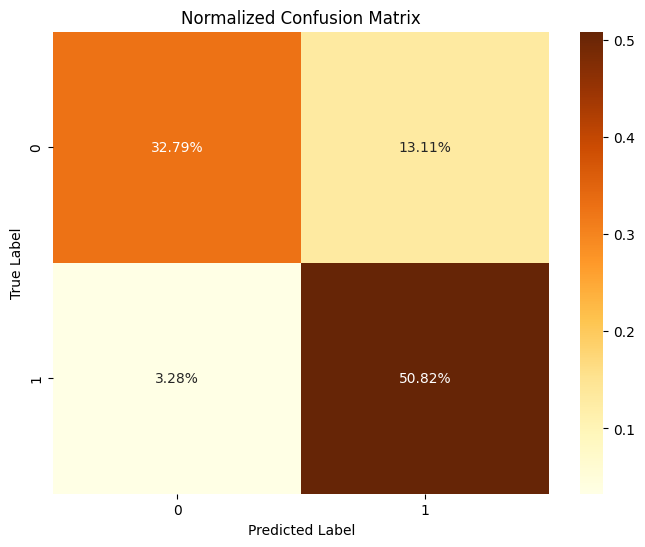

In [ ]:
normalized_cf_matrix6 = cf_mat6 / np.sum(cf_mat6)
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_cf_matrix6, annot=True, fmt='.2%', cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
recall6 = recall_score(y_test, y_pred6)
recalls['XGBoost'] = recall6

precision6 = precision_score(y_test, y_pred6)
precisions['XGBoost'] = precision6

f6 = 2*((precision6*recall6)/(precision6+recall6))
f1_scores['XGBoost'] = f6

In [ ]:

print("XGBoost Performance Metrics:")
print("Accuracy:", acc6)
print("Precision:", precision6)
print("Recall:", recall6)
print("F1-score:", f6)

XGBoost Performance Metrics:
Accuracy: 83.60655737704919
Precision: 0.7948717948717948
Recall: 0.9393939393939394
F1-score: 0.8611111111111112


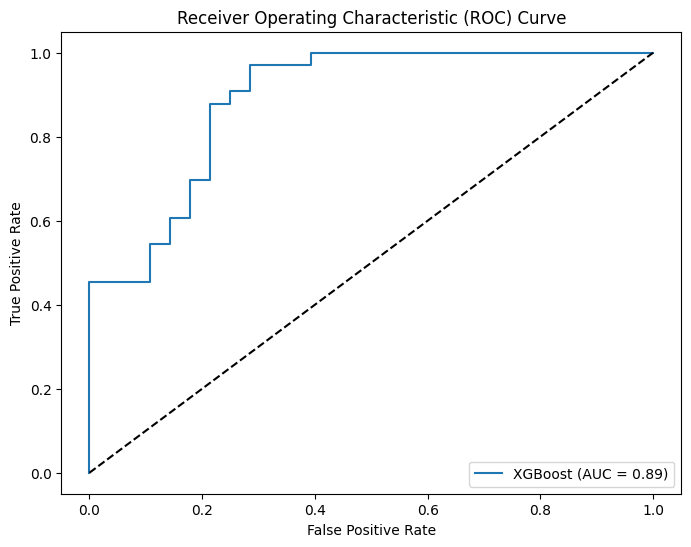

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate the predicted probabilities
y_pred_prob6 = xgb_final.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob6)

# Calculate the AUC score
auc_score6 = roc_auc_score(y_test, y_pred_prob6)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(auc_score6))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
AUC['XGBoost'] = auc_score6

##7. Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

estimator_values = [50, 100, 150, 200, 250]

avg_accuracy_scores = []

# Perform cross-validation
for n_estimators in estimator_values:
    ada = AdaBoostClassifier(n_estimators=n_estimators)
    scores = cross_val_score(ada, X, y, cv=10)
    avg_accuracy = np.mean(scores)
    avg_accuracy_scores.append(avg_accuracy)
    print("Number of estimators: {}, Average Accuracy: {:.4f}".format(n_estimators, avg_accuracy))



Number of estimators: 50, Average Accuracy: 0.8113
Number of estimators: 100, Average Accuracy: 0.7881
Number of estimators: 150, Average Accuracy: 0.7782
Number of estimators: 200, Average Accuracy: 0.7814
Number of estimators: 250, Average Accuracy: 0.7716


In [ ]:
# Find the index of the maximum average accuracy score
best_index = np.argmax(avg_accuracy_scores)
best_n_estimators = estimator_values[best_index]
print("Best number of estimators: {}".format(best_n_estimators))

Best number of estimators: 50


Based on the cross-validation results, it appears that the best number of estimators for AdaBoost on the heart dataset is 50. The average accuracy achieved with 50 estimators is 0.8113.

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=50)

# Fit the model on the training data
adaboost.fit(X_train, y_train)


AdaBoostClassifier()

In [ ]:
y_pred7=adaboost.predict(X_test)

In [ ]:
acc7 = accuracy_score(y_test, y_pred7)*100
accuracy['Adaboost'] = acc7
print("Accuracy of Adaboost: {:.2f}%".format(acc7))

Accuracy of Adaboost: 78.69%


In [ ]:
print(pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred7}))

     Y_test  Y_pred
179       0       0
197       0       0
285       0       0
194       0       1
188       0       1
..      ...     ...
14        1       1
4         1       1
224       0       0
202       0       0
12        1       1

[61 rows x 2 columns]


In [ ]:
cf_mat7 = confusion_matrix(y_test, y_pred7)
cf_mat7

array([[19,  9],
       [ 4, 29]])

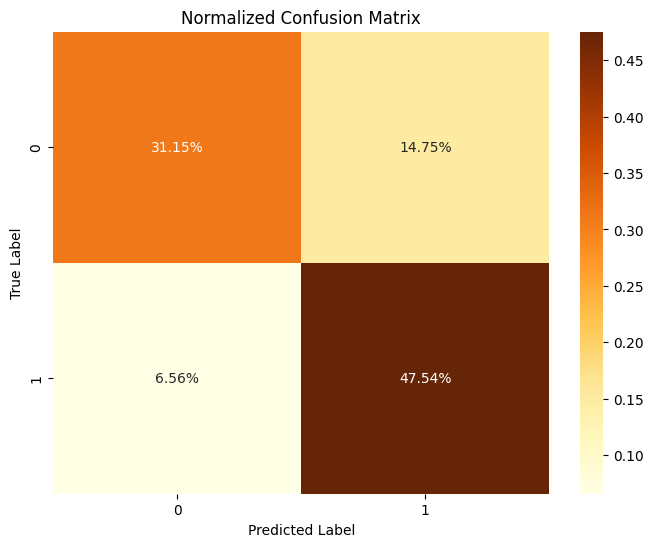

In [ ]:
normalized_cf_matrix7 = cf_mat7 / np.sum(cf_mat7)
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_cf_matrix7, annot=True, fmt='.2%', cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
recall7 = recall_score(y_test, y_pred7)
recalls['Adaboost'] = recall7

precision7 = precision_score(y_test, y_pred7)
precisions['Adaboost'] = precision7

f7 = 2*((precision7*recall7)/(precision7+recall7))
f1_scores['Adaboost'] = f7

In [ ]:
print("AdaBoost Performance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

AdaBoost Performance Metrics:
Accuracy: {'Naive Bayes': 81.9672131147541, 'Logistic Regression': 80.32786885245902, 'Decision Tree': 70.49180327868852, 'Random Forest': 81.9672131147541, 'KNN': 80.32786885245902, 'XGBoost': 83.60655737704919, 'Adaboost': 78.68852459016394}
Precision: 0.7894736842105263
Recall: 0.9090909090909091
F1-score: 0.8450704225352113


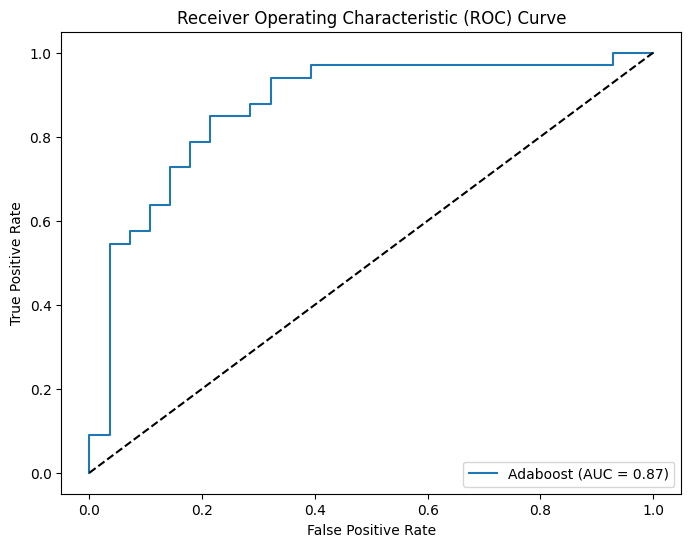

In [ ]:
# Calculate the predicted probabilities
y_pred_prob7 = adaboost.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob7)

# Calculate the AUC score
auc_score7 = roc_auc_score(y_test, y_pred_prob7)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Adaboost (AUC = {:.2f})'.format(auc_score7))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
AUC['Adaboost'] = auc_score7

# ***Comparing models***

In [ ]:
accuracy

{'Naive Bayes': 81.9672131147541,
 'Logistic Regression': 80.32786885245902,
 'Decision Tree': 70.49180327868852,
 'Random Forest': 81.9672131147541,
 'KNN': 80.32786885245902,
 'XGBoost': 83.60655737704919,
 'Adaboost': 78.68852459016394}

In [ ]:
recalls

{'Naive Bayes': 0.9090909090909091,
 'Logistic Regression': 0.9090909090909091,
 'Decision Tree': 0.7878787878787878,
 'Random Forest': 0.9393939393939394,
 'KNN': 0.8787878787878788,
 'XGBoost': 0.9393939393939394,
 'Adaboost': 0.8787878787878788}

In [ ]:
precisions

{'Naive Bayes': 0.7894736842105263,
 'Logistic Regression': 0.7692307692307693,
 'Decision Tree': 0.7027027027027027,
 'Random Forest': 0.775,
 'KNN': 0.7837837837837838,
 'XGBoost': 0.7948717948717948,
 'Adaboost': 0.7631578947368421}

In [ ]:
f1_scores

{'Naive Bayes': 0.8450704225352113,
 'Logistic Regression': 0.8333333333333333,
 'Decision Tree': 0.7428571428571429,
 'Random Forest': 0.8493150684931509,
 'KNN': 0.8285714285714285,
 'XGBoost': 0.8611111111111112,
 'Adaboost': 0.8169014084507042}

In [ ]:
AUC

{'Naive Bayes': 0.8755411255411256,
 'Logistic Regression': 0.6515151515151516,
 'Decision Tree': 0.6975108225108225,
 'Random Forest': 0.9177489177489176,
 'KNN': 0.6612554112554112,
 'XGBoost': 0.8896103896103896,
 'Adaboost': 0.8701298701298702}

In [ ]:
data = {'accuracy': accuracy, 'recalls': recalls, 'precisions': precisions, 'f1_scores': f1_scores, 'AUC': AUC}

model = pd.DataFrame(data, index=['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'XGBoost', 'Adaboost'])
model

,accuracy,recalls,precisions,f1_scores,AUC
Naive Bayes,81.967213,0.909091,0.789474,0.845070,0.875541
Logistic Regression,80.327869,0.909091,0.769231,0.833333,0.651515
Decision Tree,70.491803,0.787879,0.702703,0.742857,0.697511
Random Forest,81.967213,0.939394,0.775000,0.849315,0.917749
KNN,80.327869,0.878788,0.783784,0.828571,0.661255
XGBoost,83.606557,0.939394,0.794872,0.861111,0.889610
Adaboost,78.688525,0.878788,0.763158,0.816901,0.870130


## Creating barplot for all the metrics

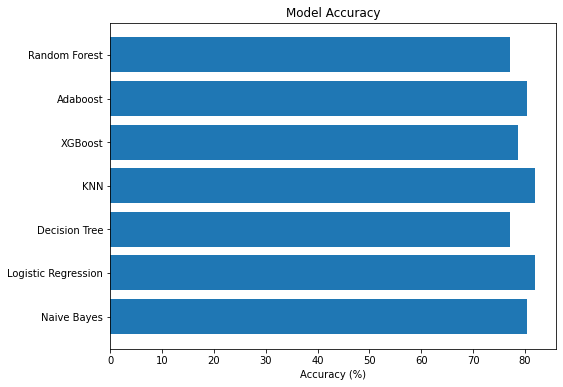

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(list(accuracy.keys()), list(accuracy.values()))
ax.set_xlabel('Accuracy (%)')
ax.set_title('Model Accuracy')
plt.show()

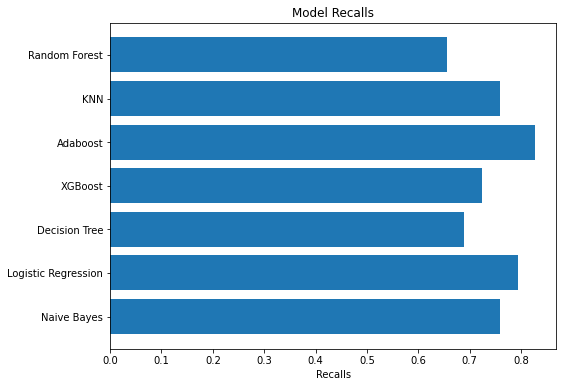

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(list(recalls.keys()), list(recalls.values()))
ax.set_xlabel('Recalls')
ax.set_title('Model Recalls')
plt.show()

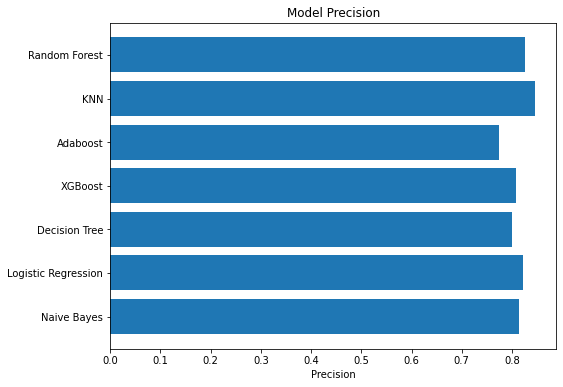

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(list(precisions.keys()), list(precisions.values()))
ax.set_xlabel('Precision')
ax.set_title('Model Precision')
plt.show()

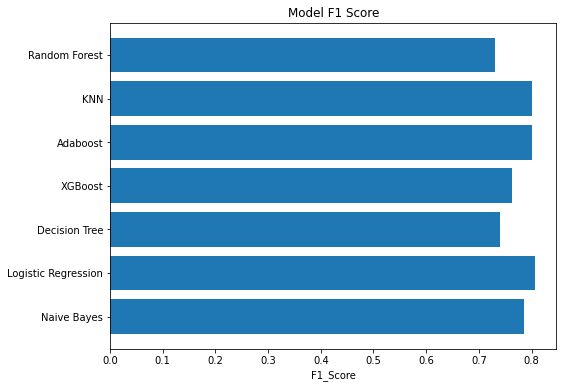

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(list(f1_scores.keys()), list(f1_scores.values()))
ax.set_xlabel('F1_Score')
ax.set_title('Model F1 Score')
plt.show()

In [ ]:
model

,accuracy,recalls,precisions,f1_scores
Naive Bayes,80.327869,0.758621,0.814815,0.785714
Logistic Regression,81.967213,0.793103,0.821429,0.807018
Decision Tree,77.049180,0.689655,0.800000,0.740741
XGBoost,78.688525,0.724138,0.807692,0.763636
Adaboost,80.327869,0.827586,0.774194,0.800000
KNN,81.967213,0.758621,0.846154,0.800000
Random Forest,77.049180,0.655172,0.826087,0.730769


# Conclusion:
* We see that 4 models 'Naive Bayes', 'Logistic Regression', 'XGBoost', and 'Random Forest' performing pretty effectively in this dataset. The further analysis will be conducted in the report.

# Prepare a predictive system for the app


In [ ]:
## Let's copy an observation from the heart.csv file as an input
input_data = (52,1,2,172,199,1,1,162,0,0.5,2,0,3)

# Convert them into numpy array so it's more convenient for the model
convert_input = np.asarray(input_data)

As we predict for the final instance (1 or 0), I will reshape the converted array to (1, -1) which means we have 1 row, and the -1 in the reshape function is a placeholder that allows NumPy to automatically infer the appropriate number of columns based on the size of the input data and the desired shape. So basically, we will have 1 row and 13 columns as the data set size.

In [ ]:
reshaped_input = convert_input.reshape(1, -1)

In [ ]:
# Make the prediction
prediction = xgb_final.predict(reshaped_input)

if prediction[0] == 0:
    print('You do not have heart disease.')
else:
    print('You have early signs of heart disease.')

You have early signs of heart disease.


Here is the full input directly from the dataset:
(52,1,2,172,199,1,1,162,0,0.5,2,0,3,1). The model has correctly classify this person's health status.

# Model Saving and Export

In [ ]:
filepath = "xgboost_model.json"

# Save the XGBoost model
xgb_final.save_model(filepath)

In [ ]:
# Load the XGBoost model
import xgboost as xgb
loaded_model = xgb.Booster()
loaded_model.load_model(filepath)

In [ ]:
for column in X.columns:
  print(column)

age
sex
cp
trtbps
chol
fbs
restecg
thalachh
exng
oldpeak
slp
caa
thall
